In [4]:
pip install langchain

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install langchain_community

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install ollama

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U langchain-ollama

  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting uninstall: langchain-ollama
    Found existing installation: langchain-ollama 0.2.0
    Uninstalling langchain-ollama-0.2.0:
      Successfully uninstalled langchain-ollama-0.2.0
Note: you may need to restart the kernel to use updated packages.


In [12]:
from langchain_ollama import OllamaLLM

In [14]:
llm = OllamaLLM(model="my-antisocial-llamav2")
import pandas as pd
import re 
from sklearn.model_selection import train_test_split

In [ ]:
ff1 = pd.read_csv("test_data.csv")

In [18]:
#clean text
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

#convert to strings
def convert_all_comments_to_strings(ff1):
    comments_list = ff1['comment_text'].astype(str).tolist()
    cleaned_comments = [clean_text(comment) for comment in comments_list]
    return cleaned_comments
    
all_comments_as_strings = convert_all_comments_to_strings(ff1)
k=0
data_list = []
#main loop
while k<len(all_comments_as_strings):
    answer=llm.invoke(all_comments_as_strings[k])
    data = {'comment_text': all_comments_as_strings[k]}
    k+=1
    matches = re.findall(r'\[([^\]]+)\]', answer)
    for match in matches:
        parts = match.split()
        if len(parts) > 1:
            label = ' '.join(parts[:-1])
            value = parts[-1]
            data[label] = value
            
    data_list.append(data)
        
answers_df = pd.DataFrame(data_list)

In [22]:
answers_df.to_csv('train_with_aswersv4.csv', index=False)

In [77]:
answers_df = answers_df.iloc[:, :7]
answers_df.to_csv('aaa.csv', index=False)

In [82]:
updated_df.to_csv("aaa_a.csv", index=False)

In [20]:
file_path = 'aaa.csv'
data = pd.read_csv(file_path)

# taking skipped rows
missing_evaluations = data[data.iloc[:, 1:].isnull().any(axis=1)]

# saving skipped rows
missing_file_path = 'missing_evaluations.csv'
missing_evaluations.to_csv(missing_file_path, index=False)

# saving not skipped rows
remaining_data = data.drop(missing_evaluations.index)
remaining_file_path = 'remaining_data.csv'
remaining_data.to_csv(remaining_file_path, index=False)

In [65]:
ff2= pd.read_csv('missing_evaluations.csv')

In [132]:
ff2=ff2.drop(columns=ff2.columns[1:])
ff3.to_csv('missing_evaluations1.csv', index=False)

In [136]:
#loop again for skipped rows
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def convert_all_comments_to_strings(ff3):
    comments_list = ff3['comment_text'].astype(str).tolist()
    cleaned_comments = [clean_text(comment) for comment in comments_list]
    return cleaned_comments
    
all_comments_as_strings = convert_all_comments_to_strings(ff3)
k=0
data_list = []
while k<len(all_comments_as_strings):
    answer=llm.invoke(all_comments_as_strings[k])
    data = {'comment_text': all_comments_as_strings[k]}
    k+=1
    matches = re.findall(r'\[([^\]]+)\]', answer)
    for match in matches:
        parts = match.split()
        if len(parts) > 1:
            label = ' '.join(parts[:-1])
            value = parts[-1]
            data[label] = value
            
    data_list.append(data)
        
answers_df = pd.DataFrame(data_list)


In [139]:
answers_df.to_csv('aaamissing_evaluations2.csv', index=False)

In [105]:
answers_df = answers_df.iloc[:, :7]
answers_df.to_csv('aaam.csv', index=False)

In [258]:
aaam_data = pd.read_csv('aaam.csv')
corrected_empty_rows_count = aaa_data.iloc[:, 1:7].isna().all(axis=1).sum()
print(f"pocet prazdnych riadkov: {corrected_empty_rows_count}")

pocet prazdnych riadkov: 1618


In [164]:
aaam_path = 'aaam.csv'
missing_evaluations_path = 'missing_evaluations1.csv'

aaam_data = pd.read_csv(aaam_path)
missing_evaluations_data = pd.read_csv(missing_evaluations_path)

# replace empty rows in the file `aaam.csv` with the corresponding rows from `missing_evaluations1.csv`
aaam_data["comment_text"] = missing_evaluations_data["comment_text"]

# saving
updated_aaam_path = 'aaamu.csv'
aaam_data.to_csv(updated_aaam_path, index=False)

In [177]:
aaa_path = 'aaa.csv'
updated_aaam_path = 'aaamu.csv'
aaa_data = pd.read_csv(aaa_path)
updated_aaam_data = pd.read_csv(updated_aaam_path)

# identification of skipped rows in `aaa.csv`
missing_responses_mask = aaa_data.iloc[:, 1:7].isna().all(axis=1)

# replace empty rows in the file aaa.csv with the corresponding rows from updated_aaam.csv
aaa_data.loc[missing_responses_mask, :] = updated_aaam_data.loc[
    :missing_responses_mask.sum() - 1, :].values

# count skipped rows after joining
corrected_empty_rows_count = aaa_data.iloc[:, 1:7].isna().all(axis=1).sum()

# saving result
corrected_merged_aaa_path = 'aaacompleted.csv'
aaa_data.to_csv(corrected_merged_aaa_path, index=False)

print(f"Pocet prazdnych riadkov po zluceni: {corrected_empty_rows_count}")


Pocet prazdnych riadkov po zluceni: 1618


In [203]:
data = pd.read_csv('aaacompleted.csv')

# map for CAPS
column_mapping = {
    "TOXIC": "toxic",
    "SERVE TOXIC": "severe_toxic",
    "OBSCENE": "obscene",
    "THREAT": "threat",
    "INSULT": "insult",
    "IDENTITY HATE": "identity_hate"
}

# rename
data = data.rename(columns=column_mapping)

#converting yes to 1 and no to 0
columns_to_convert = ["toxic", "severe_toxic", "obscene","threat","insult","identity_hate"] 
for col in columns_to_convert:
    data[col] = data[col].map({"YES": 1, "NO": 0})

for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')
    
data.to_csv("test_my.csv", index=False)

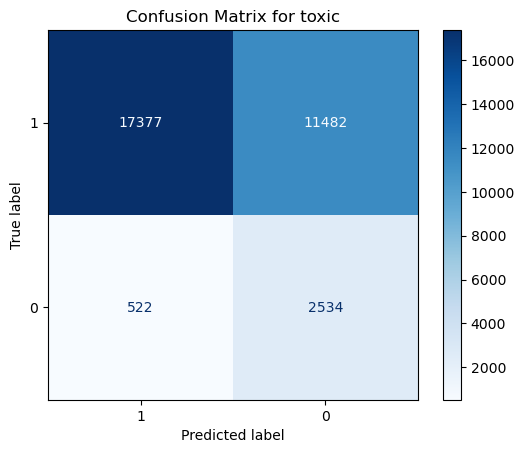

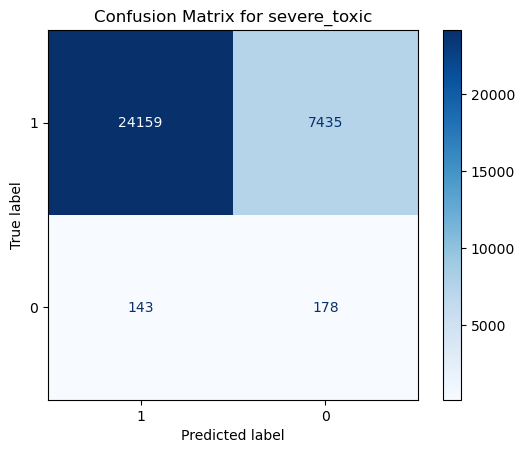

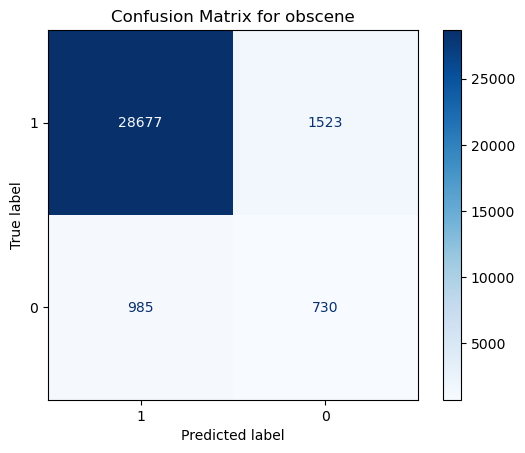

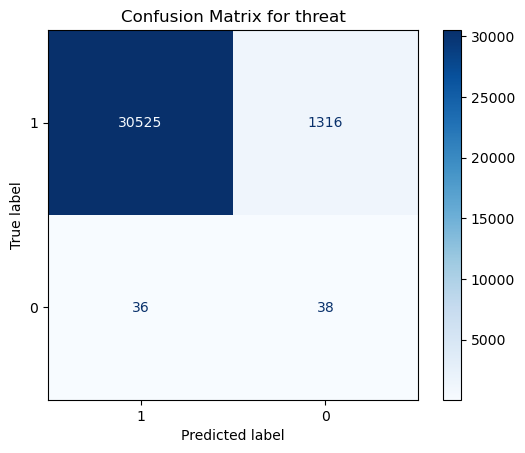

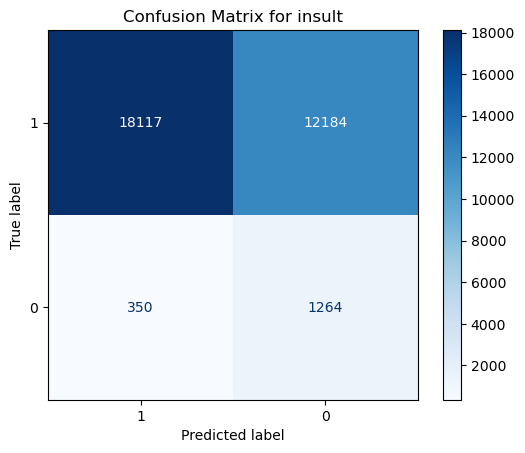

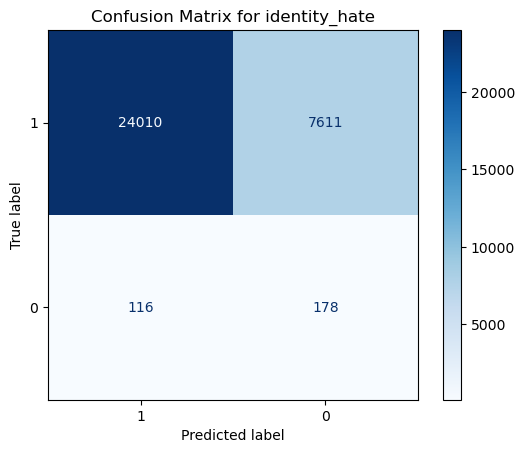

Multi-label Confusion Matrices:
 [[[17377 11482]
  [  522  2534]]

 [[24159  7435]
  [  143   178]]

 [[28677  1523]
  [  985   730]]

 [[30525  1316]
  [   36    38]]

 [[18117 12184]
  [  350  1264]]

 [[24010  7611]
  [  116   178]]]


In [270]:
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

test_data_path = 'test_data_only_questions.csv'  # true labels
test_my_path = 'test_my.csv'  # predicted labels

test_data = pd.read_csv(test_data_path)
test_my = pd.read_csv(test_my_path)

columns_to_compare = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

true_labels = test_data[columns_to_compare].fillna(0).astype(int).values
predicted_labels = test_my[columns_to_compare].fillna(0).astype(int).values

tn,fn,tp,fp = multilabel_confusion_matrix(true_labels, predicted_labels)

for idx, column in enumerate(columns_to_compare):
    disp = ConfusionMatrixDisplay(confusion_matrix=ml_cm[idx], display_labels=[1, 0])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {column}")
    plt.show()

print("Multi-label Confusion Matrices:\n", ml_cm)


In [237]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=columns_to_compare, zero_division=0)
print(report)

               precision    recall  f1-score   support

        toxic       0.18      0.83      0.30      3056
 severe_toxic       0.02      0.55      0.04       321
      obscene       0.32      0.43      0.37      1715
       threat       0.03      0.51      0.05        74
       insult       0.09      0.78      0.17      1614
identity_hate       0.02      0.61      0.04       294

    micro avg       0.11      0.70      0.18      7074
    macro avg       0.11      0.62      0.16      7074
 weighted avg       0.18      0.70      0.26      7074
  samples avg       0.04      0.08      0.05      7074

